In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [23]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [26]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [27]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [28]:
df = df.dropna()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [29]:
df.drop('name', axis = 1, inplace = True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [30]:
df.drop('origin', axis = 1, inplace = True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [31]:
x = df.drop('mpg', axis = 1, inplace = False)
y = df['mpg']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [39]:
y_predit = lr.predict(x_test)

In [37]:
y_test

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
101    23.0
65     14.0
56     26.0
262    19.2
216    31.5
Name: mpg, Length: 79, dtype: float64

In [41]:
# 분산은 11
mse = mean_squared_error(y_test, y_predit)
mse

11.878262288865702

In [42]:
# 표준 편차, +- 3 정도의 값이 오차가 발생. 이 값을 줄이는것이 좋은 모델
np.sqrt(mse)

3.446485498136573

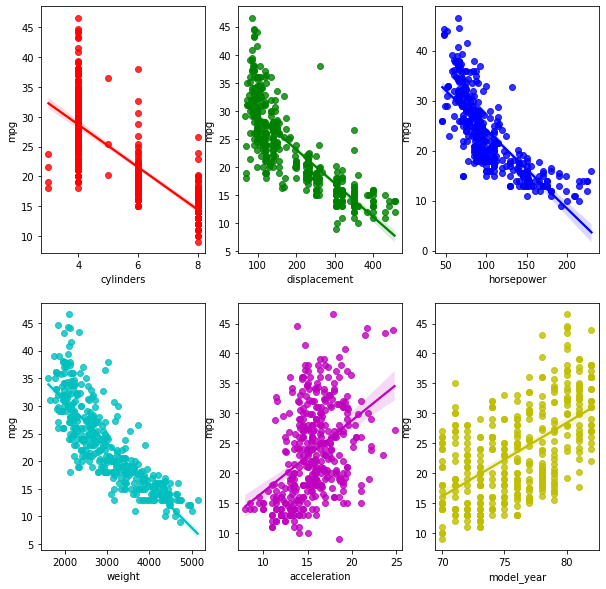

In [52]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 3, 1)
sns.regplot(x = 'cylinders', y = 'mpg', data = df, color = 'r')

plt.subplot(2, 3, 2)
sns.regplot(x = 'displacement', y = 'mpg', data = df, color = 'g')

plt.subplot(2, 3, 3)
sns.regplot(x = 'horsepower', y = 'mpg', data = df, color = 'b')

plt.subplot(2, 3, 4)
sns.regplot(x = 'weight', y = 'mpg', data = df, color = 'c')

plt.subplot(2, 3, 5)
sns.regplot(x = 'acceleration', y = 'mpg', data = df, color = 'm')

plt.subplot(2, 3, 6)
sns.regplot(x = 'model_year', y = 'mpg', data = df, color = 'y')

In [56]:
cylinders_1 = int(input('cylinders : ') )
displacement_1 = int(input('displacement : ') )
horsepower_1 = int(input('cylindhorsepowerers : ') )
weight_1 = int(input('weight : ') )
acceleration_1 = int(input('acceleration : ') )
model_year_1 = int(input('model_year : ') )

cylinders : 6
displacement : 300
cylindhorsepowerers : 160
weight : 4000
acceleration : 23
model_year : 78


In [57]:
# 예측 연비는 19
lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1, model_year_1]])

array([19.62302709])